In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [ ]:
X_train = np.load('X_kannada_MNIST_train.npz')['arr_0']
X_test = np.load('X_kannada_MNIST_test.npz')['arr_0']
y_train = np.load('y_kannada_MNIST_train.npz')['arr_0']
y_test = np.load('y_kannada_MNIST_test.npz')['arr_0']
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


**PCA(Principle Component Analysis)**

In [ ]:
# Flatten the images into 1D arrays (since PCA expects 2D arrays)
X_train_flat = X_train.reshape(-1, 28*28)
X_test_flat = X_test.reshape(-1, 28*28)

# Create a PCA object with 10 components
pca = PCA(n_components=10)

# Fit the PCA model to the training data and transform both train and test data
X_train_pca = pca.fit_transform(X_train_flat)
X_test_pca = pca.transform(X_test_flat)

# Verify the new shapes of the datasets after PCA
print("Train data after PCA shape:", X_train_pca.shape)
print("Test data after PCA shape:", X_test_pca.shape)
print("Train labels shape:", y_train.shape)
print("Test labels shape:", y_test.shape)

Train data after PCA shape: (60000, 10)
Test data after PCA shape: (10000, 10)
Train labels shape: (60000,)
Test labels shape: (10000,)


**Decision Tree**

In [ ]:
dt_classifier = DecisionTreeClassifier()

dt_classifier.fit(X_train_pca, y_train)

y_pred = dt_classifier.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_pred)
print("Decision Trees Accuracy:", accuracy)

Decision Trees Accuracy: 0.8046


In [ ]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_pca, y_train)
y_pred_dt = dt_classifier.predict(X_test_pca)
report_dt = classification_report(y_test, y_pred_dt)
print("Decision Trees Classification Report:")
print(report_dt)

Decision Trees Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.71      0.74      1000
           1       0.76      0.80      0.78      1000
           2       0.95      0.92      0.93      1000
           3       0.77      0.79      0.78      1000
           4       0.79      0.85      0.82      1000
           5       0.82      0.79      0.81      1000
           6       0.78      0.77      0.77      1000
           7       0.76      0.69      0.72      1000
           8       0.81      0.87      0.84      1000
           9       0.82      0.83      0.82      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



In [ ]:
dt_pred = dt_classifier.predict(X_test_pca)
dt_cm = confusion_matrix(y_test, dt_pred)

print("Decision Trees Confusion Matrix:")
print(dt_cm)



Decision Trees Confusion Matrix:
[[712 155   8  39   6   3   1  11  39  26]
 [ 81 803   7  27  10  13   7  11  30  11]
 [  7   2 918  11   2  29  16   7   5   3]
 [ 15  17   7 786  30  24  29  57  18  17]
 [  3   2   0  39 848  52  10   7  16  23]
 [  6  16   4  15 108 793  11   7  21  19]
 [  5   5   6  40  17  30 765 103   8  21]
 [ 12   9   4  54  30   6 131 690  20  44]
 [ 54  13  14   5   4  10   3   8 873  16]
 [ 25  35   2   6  24   8  10  10  54 826]]


In [ ]:
dt_pred = dt_classifier.predict(X_test_pca)
dt_precision = precision_score(y_test, dt_pred, average='macro')
dt_recall = recall_score(y_test, dt_pred, average='macro')
dt_f1 = f1_score(y_test, dt_pred, average='macro')

print("Decision Trees Precision:", dt_precision)
print("Decision Trees Recall:", dt_recall)
print("Decision Trees F1-Score:", dt_f1)

Decision Trees Precision: 0.8016273506379539
Decision Trees Recall: 0.8014000000000001
Decision Trees F1-Score: 0.8008548786025409


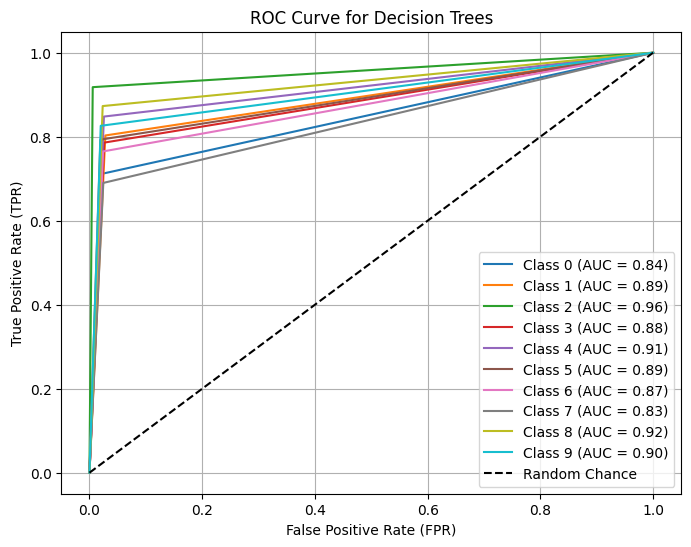

In [ ]:
# Convert the true labels to one-hot encoded format
y_test_bin = label_binarize(y_test, classes=range(10))
dt_fpr = dict()
dt_tpr = dict()
dt_auc = dict()
for class_idx in range(10):
    dt_pred_probs = dt_classifier.predict_proba(X_test_pca)[:, class_idx]
    dt_fpr[class_idx], dt_tpr[class_idx], _ = roc_curve(y_test_bin[:, class_idx], dt_pred_probs)
    dt_auc[class_idx] = auc(dt_fpr[class_idx], dt_tpr[class_idx])
plt.figure(figsize=(8, 6))
for class_idx in range(10):
    plt.plot(dt_fpr[class_idx], dt_tpr[class_idx], label='Class {} (AUC = {:.2f})'.format(class_idx, dt_auc[class_idx]))

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Decision Trees')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

**K-NN Algorithm**

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)

knn_classifier.fit(X_train_pca, y_train)

y_pred = knn_classifier.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_pred)
print("K-NN Accuracy:", accuracy)

K-NN Accuracy: 0.8795


In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_pca, y_train)
y_pred_knn = knn_classifier.predict(X_test_pca)
report_knn = classification_report(y_test, y_pred_knn)
print("K-Nearest Neighbors Classification Report:")
print(report_knn)

K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.78      0.84      1000
           1       0.81      0.94      0.87      1000
           2       0.99      0.98      0.99      1000
           3       0.85      0.87      0.86      1000
           4       0.82      0.95      0.88      1000
           5       0.91      0.86      0.88      1000
           6       0.82      0.83      0.83      1000
           7       0.86      0.71      0.78      1000
           8       0.91      0.96      0.94      1000
           9       0.93      0.92      0.93      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [ ]:
knn_pred = knn_classifier.predict(X_test_pca)
knn_cm = confusion_matrix(y_test, knn_pred)

print("K-NN Confusion Matrix:")
print(knn_cm)

K-NN Confusion Matrix:
[[775 168   3  28   2   0   2   3  14   5]
 [ 16 945   0  13   5   1   1   2  11   6]
 [  4   1 979   3   0   8   1   2   1   1]
 [ 13  13   1 870  18  26   5  26  22   6]
 [  0   1   0  15 947  26   2   1   5   3]
 [  0   4   0  10 116 857   2   3   4   4]
 [  0   6   0  41  20  10 834  72   2  15]
 [  8  11   0  48  30   5 162 708   4  24]
 [ 14  10   1   1   2   5   2   0 959   6]
 [  6  10   0   0  21   2   7   5  28 921]]


In [ ]:
knn_pred = knn_classifier.predict(X_test_pca)
knn_precision = precision_score(y_test, knn_pred, average='macro')
knn_recall = recall_score(y_test, knn_pred, average='macro')
knn_f1 = f1_score(y_test, knn_pred, average='macro')

print("K-NN Precision:", knn_precision)
print("K-NN Recall:", knn_recall)
print("K-NN F1-Score:", knn_f1)

K-NN Precision: 0.8826459662589665
K-NN Recall: 0.8794999999999998
K-NN F1-Score: 0.8784509472335008


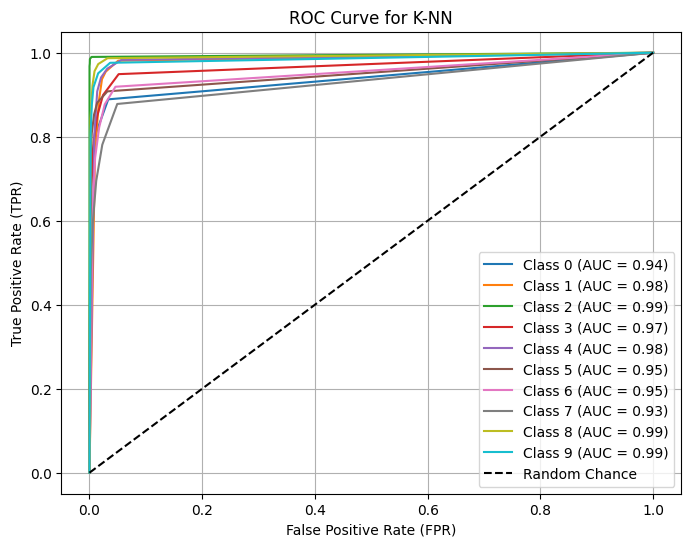

In [ ]:
# Convert the true labels to one-hot encoded format
y_test_bin = label_binarize(y_test, classes=range(10))
knn_fpr = dict()
knn_tpr = dict()
knn_auc = dict()
for class_idx in range(10):
    knn_pred_probs = knn_classifier.predict_proba(X_test_pca)[:, class_idx]
    knn_fpr[class_idx], knn_tpr[class_idx], _ = roc_curve(y_test_bin[:, class_idx], knn_pred_probs)
    knn_auc[class_idx] = auc(knn_fpr[class_idx], knn_tpr[class_idx])
plt.figure(figsize=(8, 6))
for class_idx in range(10):
    plt.plot(knn_fpr[class_idx], knn_tpr[class_idx], label='Class {} (AUC = {:.2f})'.format(class_idx, knn_auc[class_idx]))

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for K-NN')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

**Random Forest**

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train_pca, y_train)

y_pred = rf_classifier.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", accuracy)

Random Forest Accuracy: 0.8745


In [ ]:
rf_pred = rf_classifier.predict(X_test_pca)
rf_cm = confusion_matrix(y_test, rf_pred)

print("Random Forest Confusion Matrix:")
print(rf_cm)


Random Forest Confusion Matrix:
[[777 152   2  28   5   0   3   3  23   7]
 [ 33 911   0  22   6   2   0   2  15   9]
 [  4   2 982   1   0   6   0   4   1   0]
 [ 10   8   1 885  18  19  11  28  18   2]
 [  0   2   0  32 914  34   1   3   8   6]
 [  0   2   2   8 119 850   6   3   6   4]
 [  2   7   1  56  12  25 821  57   3  16]
 [  3  12   0  35  24   1 132 755   9  29]
 [ 16  14   1   4   3   6   1   0 951   4]
 [  7  10   0   4  16   0   5   5  54 899]]


In [ ]:
rf_pred = rf_classifier.predict(X_test_pca)
rf_precision = precision_score(y_test, rf_pred, average='macro')
rf_recall = recall_score(y_test, rf_pred, average='macro')
rf_f1 = f1_score(y_test, rf_pred, average='macro')

print("Random Forest Precision:", rf_precision)
print("Random Forest Recall:", rf_recall)
print("Random Forest F1-Score:", rf_f1)

Random Forest Precision: 0.8772033948193236
Random Forest Recall: 0.8744999999999999
Random Forest F1-Score: 0.8739350939344765


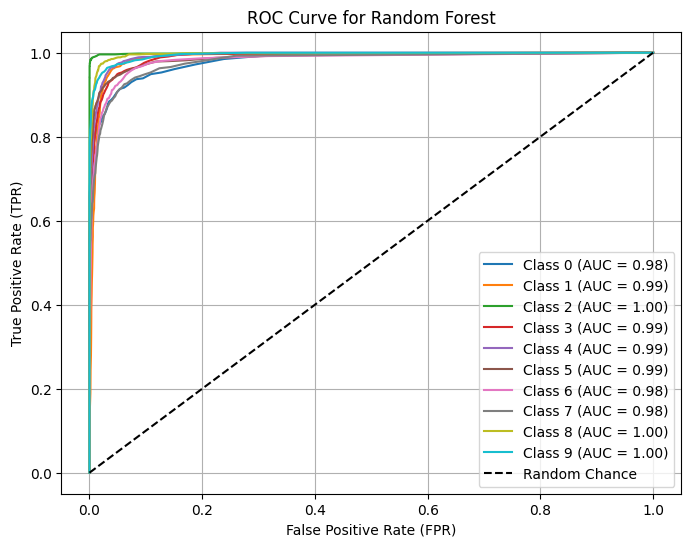

In [ ]:
rf_fpr = dict()
rf_tpr = dict()
rf_auc = dict()
for class_idx in range(10):
    rf_pred_probs = rf_classifier.predict_proba(X_test_pca)[:, class_idx]
    rf_fpr[class_idx], rf_tpr[class_idx], _ = roc_curve(y_test_bin[:, class_idx], rf_pred_probs)
    rf_auc[class_idx] = auc(rf_fpr[class_idx], rf_tpr[class_idx])
plt.figure(figsize=(8, 6))
for class_idx in range(10):
    plt.plot(rf_fpr[class_idx], rf_tpr[class_idx], label='Class {} (AUC = {:.2f})'.format(class_idx, rf_auc[class_idx]))

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

**Naive** **Bayes**

In [ ]:
nb_classifier = GaussianNB()

nb_classifier.fit(X_train_pca, y_train)


y_pred = nb_classifier.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_pred)
print("Naive Bayes Accuracy:", accuracy)

Naive Bayes Accuracy: 0.7725


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.61      0.68      1000
           1       0.70      0.75      0.72      1000
           2       0.89      0.97      0.92      1000
           3       0.68      0.84      0.75      1000
           4       0.71      0.87      0.78      1000
           5       0.85      0.73      0.79      1000
           6       0.77      0.73      0.75      1000
           7       0.74      0.65      0.69      1000
           8       0.76      0.82      0.79      1000
           9       0.91      0.75      0.83      1000

    accuracy                           0.77     10000
   macro avg       0.78      0.77      0.77     10000
weighted avg       0.78      0.77      0.77     10000



In [ ]:
nb_pred = nb_classifier.predict(X_test_pca)
nb_cm = confusion_matrix(y_test, nb_pred)

print("Naive Bayes Confusion Matrix:")
print(nb_cm)


Naive Bayes Confusion Matrix:
[[609 228  16  70   8   0   2  13  45   9]
 [ 25 749   9 121   8   2   0   0  66  20]
 [  9   1 966   3   0  16   1   3   1   0]
 [ 13   7   2 843  33  16  21  64   0   1]
 [  1   1   1  39 872  43   1   7  28   7]
 [  0   2  15  47 165 731   6  16  12   6]
 [  5   9  51  30  25  44 728  95   3  10]
 [  9  17   4  79  51   1 176 651   2  10]
 [ 89  35  26   6   4   3   2   4 823   8]
 [ 19  28   1   8  61   0   3  21 106 753]]


In [ ]:
nb_pred = nb_classifier.predict(X_test_pca)
nb_precision = precision_score(y_test, nb_pred, average='macro')
nb_recall = recall_score(y_test, nb_pred, average='macro')
nb_f1 = f1_score(y_test, nb_pred, average='macro')

print("Naive Bayes Precision:", nb_precision)
print("Naive Bayes Recall:", nb_recall)
print("Naive Bayes F1-Score:", nb_f1)

Naive Bayes Precision: 0.7794842641449802
Naive Bayes Recall: 0.7725
Naive Bayes F1-Score: 0.7711360239460918


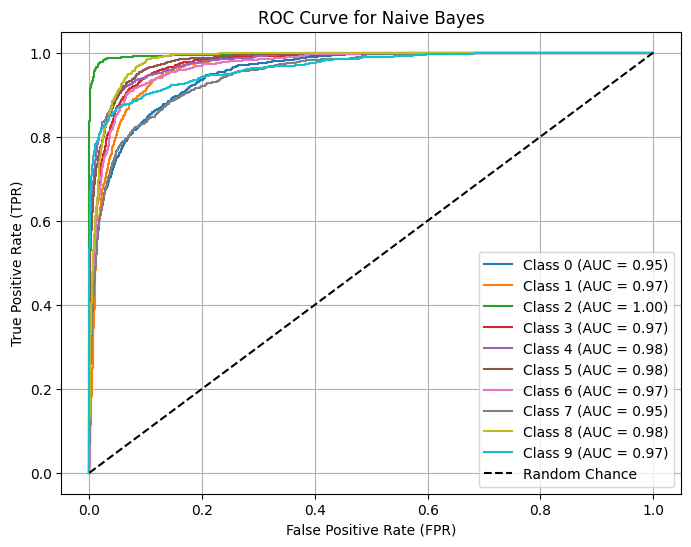

In [ ]:
# Convert the true labels to one-hot encoded format
y_test_bin = label_binarize(y_test, classes=range(10))
nb_fpr = dict()
nb_tpr = dict()
nb_auc = dict()
for class_idx in range(10):
    nb_pred_probs = nb_classifier.predict_proba(X_test_pca)[:, class_idx]
    nb_fpr[class_idx], nb_tpr[class_idx], _ = roc_curve(y_test_bin[:, class_idx], nb_pred_probs)
    nb_auc[class_idx] = auc(nb_fpr[class_idx], nb_tpr[class_idx])
plt.figure(figsize=(8, 6))
for class_idx in range(10):
    plt.plot(nb_fpr[class_idx], nb_tpr[class_idx], label='Class {} (AUC = {:.2f})'.format(class_idx, nb_auc[class_idx]))

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Naive Bayes')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
